<a href="https://colab.research.google.com/github/RoginRobert2014/CE888/blob/main/Lab_3/Lab_3_Exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [116]:
import pandas as pd
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn import metrics
from sklearn.dummy import DummyClassifier
# from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import LabelEncoder

In [117]:
# Load data from github
df = pd.read_csv('https://raw.githubusercontent.com/albanda/CE888/master/lab3/bank-additional-full.csv', sep=';')
dfcopy = df.copy()
dfcopy

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [118]:
# Use LabelEncoder to convert the label into numbers.

label_encoder = preprocessing.LabelEncoder()
dfcopy["y"] = label_encoder.fit_transform(dfcopy["y"])
print(dfcopy["y"])

0        0
1        0
2        0
3        0
4        0
        ..
41183    1
41184    0
41185    0
41186    1
41187    0
Name: y, Length: 41188, dtype: int64


In [119]:
# one-hot encoding on the categorical features
df_dummies = pd.get_dummies(dfcopy, columns=["job", "marital","marital","education","default","housing","loan","contact","month", "day_of_week","poutcome"])
df_dummies

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,marital_unknown,marital_divorced,marital_married,marital_single,marital_unknown,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,default_no,default_unknown,default_yes,housing_no,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes,contact_cellular,contact_telephone,month_apr,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,334,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0
41184,46,383,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0
41185,56,189,2,999,0,-1.1,94.767,-50.8,1.028,4963.6,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0
41186,44,442,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0


In [120]:
# Column "duration" must be deleted
cleaned_df = df_dummies.drop(['duration'],axis=1)
cleaned_df

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,marital_unknown,marital_divorced,marital_married,marital_single,marital_unknown,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,default_no,default_unknown,default_yes,housing_no,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes,contact_cellular,contact_telephone,month_apr,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,56,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
1,57,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
2,37,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
3,40,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
4,56,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0
41184,46,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0
41185,56,2,999,0,-1.1,94.767,-50.8,1.028,4963.6,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0
41186,44,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0


In [121]:
# Check if there are any missing values in the dataset. If there are, drop the rows.
nona_df = cleaned_df.dropna()
print(nona_df.size)
nona_df.head()
nona_df.shape

# cleaned_df = cleaned_df.dropna()
# print(cleaned_df.size)
# cleaned_df.head()

# nona_df = cleaned_df.dropna()
# cleaned_df.dropna(axis=0,how='any',inplace=True)
# print(cleaned_df.size)
# cleaned_df.head()

2759596


(41188, 67)

In [122]:
y = nona_df['y']
X = nona_df.drop(['y'],axis=1)
print(X.size)
print(y.size)
# Y 2718408



2718408
41188


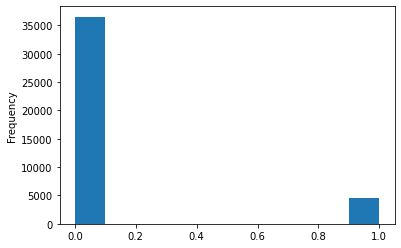

In [123]:
# Plot histogram of the label and calculate the imbalance in the dataset.
y.plot.hist()

In [124]:
# Using the train_test_split function in scikit-learn, separate your dataset into a training and a test set, with a test size of 20% and random_state=50
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=50, stratify=y)

In [125]:
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score

In [126]:
# Lets split the data into 10 folds. 
# We will use this 'kf'(StratiFiedKFold splitting stratergy) object as input to cross_val_score() method
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=50)
kf

StratifiedKFold(n_splits=10, random_state=50, shuffle=True)

In [127]:
f1_score = cross_val_score(RandomForestClassifier(random_state= 50, n_estimators=100, max_depth=3), X_train, y_train, cv= kf, scoring="f1")
print(f'F1 score for each fold are: {f1_score}')
print(f'F1 average score: {"{:.2f}".format(f1_score.mean())}')

F1 score for each fold are: [0.23555556 0.27740492 0.2826087  0.2027027  0.22883295 0.31397849
 0.23660714 0.24601367 0.23476298 0.24719101]
F1 average score: 0.25


In [128]:
# Compare the results of your classifier with that of a dummy classifier.
dummy_clf = DummyClassifier(strategy="stratified")
dummy_clf.fit(X_train, y_train)
y_Prediction_dummy = dummy_clf.predict(X_test)

# Model Accuracy, how often is the classifier correct
print("Score:", dummy_clf.score(y_test, y_Prediction_dummy))

print("F1 Score:", metrics.f1_score(y_test, y_Prediction_dummy))

print("Recall:", metrics.recall_score(y_test, y_Prediction_dummy))

print("Recall:", metrics.r2_score(y_test, y_Prediction_dummy))

Score: 0.8072347657198349
F1 Score: 0.11222222222222224
Recall: 0.10883620689655173
Recall: -0.9405874097834803


In [129]:
# dummy_clf = DummyClassifier(strategy="stratified")
# dummy_clf.fit(X_train, y_train)
# y_Prediction_dummy = dummy_clf.predict(X_test)

# Quiz
f1_score = cross_val_score(DummyClassifier(strategy="stratified"), X_train, y_train, scoring="f1",cv=10)
print(f'F1 score for each fold are: {f1_score}')
print(f'F1 average score: {"{:.2f}".format(f1_score.mean())}')

# Quiz
f1_score = cross_val_score(RandomForestClassifier(n_estimators=100, max_depth=3), X_train, y_train, cv= kf, scoring="f1")
print(f'F1 score for each fold are: {f1_score}')
print(f'F1 average score: {"{:.2f}".format(f1_score.mean())}')

F1 score for each fold are: [0.13031915 0.11653117 0.08472401 0.10670315 0.08032129 0.10368349
 0.09849521 0.12749004 0.12057667 0.09549795]
F1 average score: 0.11
F1 score for each fold are: [0.23555556 0.28888889 0.28941685 0.20224719 0.25225225 0.31759657
 0.24615385 0.25339367 0.24498886 0.25112108]
F1 average score: 0.26


In [130]:
# Quiz
f1_score = cross_val_score(RandomForestClassifier(n_estimators=300, max_depth=6), X_train, y_train, cv= 10, scoring="f1")
print(f'F1 score for each fold are: {f1_score}')
print(f'F1 average score: {"{:.2f}".format(f1_score.mean())}')

F1 score for each fold are: [0.25541126 0.30237581 0.22666667 0.29130435 0.23632385 0.31397849
 0.39837398 0.25110132 0.27133479 0.28025478]
F1 average score: 0.28


In [131]:
# Quiz
f1_score = cross_val_score(RandomForestClassifier(n_estimators=100, max_depth=8), X_train, y_train, cv= 10, scoring="f1")
print(f'F1 score for each fold are: {f1_score}')
print(f'F1 average score: {"{:.2f}".format(f1_score.mean())}')


F1 score for each fold are: [0.29831933 0.33402062 0.25695931 0.29247312 0.26638478 0.32696391
 0.40322581 0.27600849 0.30443975 0.29278351]
F1 average score: 0.31


In [132]:
# Use GridSearchCV to find a better set of parameters for your random forest.
from sklearn.model_selection import GridSearchCV

parameters = {'n_estimators': [50,100,125,200], 'max_depth':[10,20,100,None], 'random_state': [105], 'min_samples_split':[5, 10,20], 'max_features': ['auto', 'sqrt']}
# parameters = {'n_estimators': [50,100], 'max_depth':[10,20], 'random_state': [105], 'min_samples_split':[5, 10]}

clfRF = RandomForestClassifier()
clf = GridSearchCV(clfRF, parameters)
clf.fit(X_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              ra

In [133]:
# Best estimator parameters for Random Forest classifier
print(clf.best_estimator_)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=105,
                       verbose=0, warm_start=False)


In [134]:
# Printing the cross validation metrics
from sklearn.model_selection import cross_val_score

clf_RF_CV = RandomForestClassifier(max_depth=10, random_state=105, n_estimators=200, min_samples_split=10, max_features='auto')
scores = cross_val_score(clf_RF_CV, X_train, y_train, cv=5)
scores

array([0.90197269, 0.89848255, 0.89878604, 0.90394537, 0.89893778])

In [135]:
from sklearn.feature_selection import RFECV
feature_selector = RFECV(clf_RF_CV,cv=5)
feature_selector = feature_selector.fit(X_train, y_train)
feature_selector.support_
feature_selector.ranking_

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, 23, 21, 11,  1,  9,  6,
        3,  1, 14, 19, 12,  1,  1, 24, 16,  5,  1, 25,  8, 15,  1,  1, 26,
        1,  1,  4,  1,  2, 27,  1, 18,  1,  1, 22,  1,  1,  1,  1, 10, 20,
       17,  1,  1,  1, 13,  1,  7,  1,  1,  1,  1,  1,  1,  1,  1])

In [136]:
best_grid = clf.best_estimator_

import numpy as np

def evaluateModel(model_Grid, test_feature_Values, test_label_Values):
    predictionValue = model_Grid.predict(test_feature_Values)
    print("predictionValue : ", predictionValue)
    errorValue = abs(predictionValue - test_label_Values)
    mape = 100 * np.mean(errorValue / test_label_Values)
    print(mape)
    accuracy = 100 - mape
    print('**Model Performance**')
    print('The Average Error found: {:0.4f} degrees.'.format(np.mean(errorValue)))
    print('The Accuracy is = {:0.2f}%.'.format(accuracy))
    
    return accuracy

grid_accuracy = evaluateModel(best_grid,X_test, y_test)

dummy_accuracy = evaluateModel(dummy_clf, X_test, y_test)
print("dummy_accuracy ", dummy_accuracy)

print('There is an increase of {:0.2f}%.'.format( 100 * (grid_accuracy - dummy_accuracy) / dummy_accuracy))

predictionValue :  [0 0 0 ... 0 0 0]
inf
**Model Performance**
The Average Error found: 0.0981 degrees.
The Accuracy is = -inf%.
predictionValue :  [0 1 0 ... 0 0 0]
inf
**Model Performance**
The Average Error found: 0.1952 degrees.
The Accuracy is = -inf%.
dummy_accuracy  -inf
There is an increase of nan%.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in double_scalars
